<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fraud detection using the credit card transaction dataset**

##**1. Project Goals**

- Build a machine learning model to detect fraudulent transactions from a dataset of anonymized credit card transactions.
- Address the challenge of imbalanced datasets through sampling techniques.
- Evaluate model performance using metrics suitable for imbalanced datasets, like the **(Area Under the Precision-Recall Curve (AUPRC).**

##**2. Exploratory Data Analysis (EDA)**


### Importing Libraries

In [52]:
# Impoting general libraries
# import warnings
# import itertools
# import random

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and sampling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Metrics
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, f1_score, confusion_matrix

### Dataset Overview

In [59]:
#Loading the dataset
fraud_detection = pd.read_csv('/content/creditcard.csv')
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
#summary of the data
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##**3. Data Cleaning**

In [6]:
# Check for duplicates
duplicates = fraud_detection.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
fraud_detection = fraud_detection.drop_duplicates()

Number of duplicate rows: 712


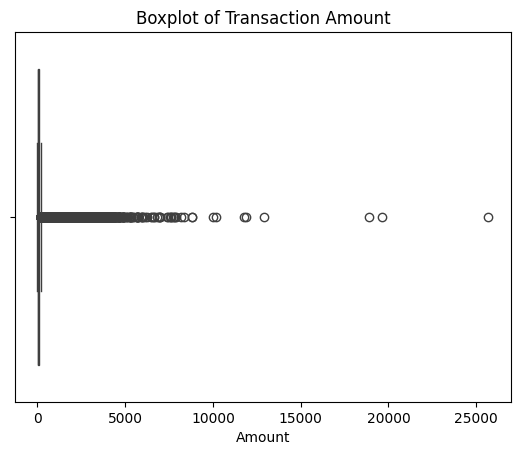

In [46]:
# Visualize outliers in the 'Amount' column
sns.boxplot(x=fraud_detection['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

# You can remove or cap extreme outliers
# q1 = fraud_detection['Amount'].quantile(0.25)
# q3 = fraud_detection['Amount'].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# # Cap outliers
# fraud_detection['Amount'] = np.where(fraud_detection['Amount'] > upper_bound, upper_bound,
#                                       np.where(fraud_detection['Amount'] < lower_bound, lower_bound, fraud_detection['Amount']))

## 4. **Data Analysis**

### Feature Analysis:



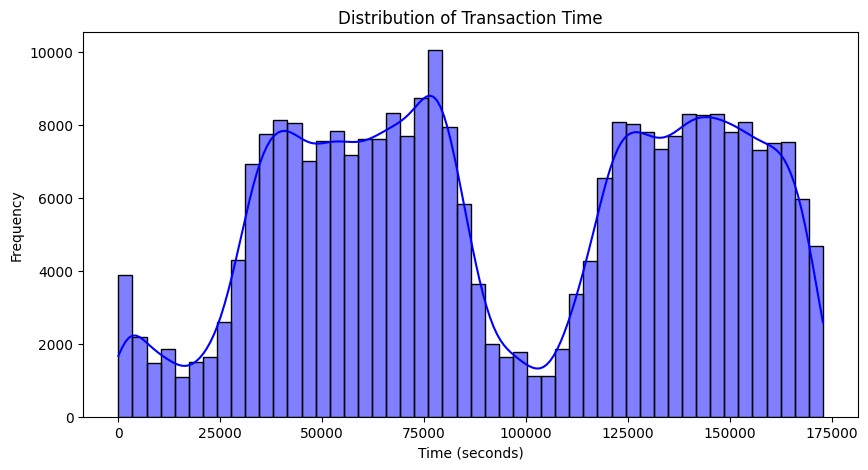

In [47]:
# Plot the distribution of 'Time'
plt.figure(figsize=(10, 5))
sns.histplot(fraud_detection['Time'], kde=True, color='blue', bins=50)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

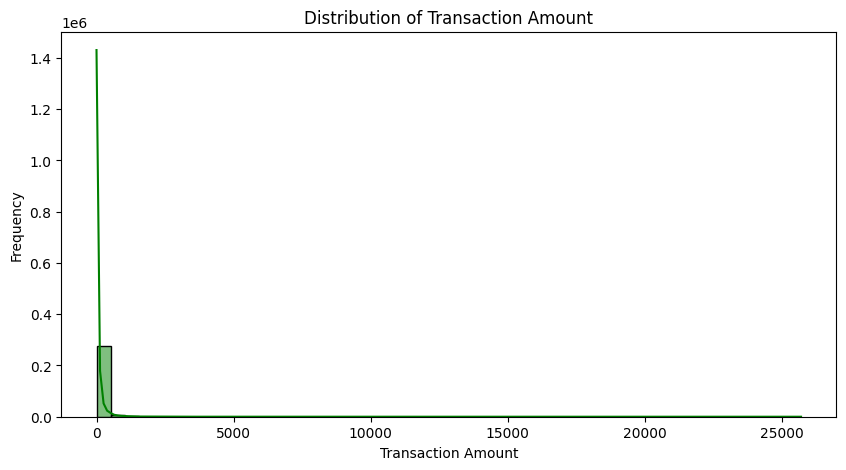

In [48]:
# Plot the distribution of 'Amount'
plt.figure(figsize=(10, 5))
sns.histplot(fraud_detection['Amount'], kde=True, color='green', bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-57-b7f156c3b9cf>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fraud_data, x='Amount', label='Fraud', shade=True, color='red')
<ipython-input-57-b7f156c3b9cf>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=not_fraud_data, x='Amount', label='Not Fraud', shade=True, color='blue')


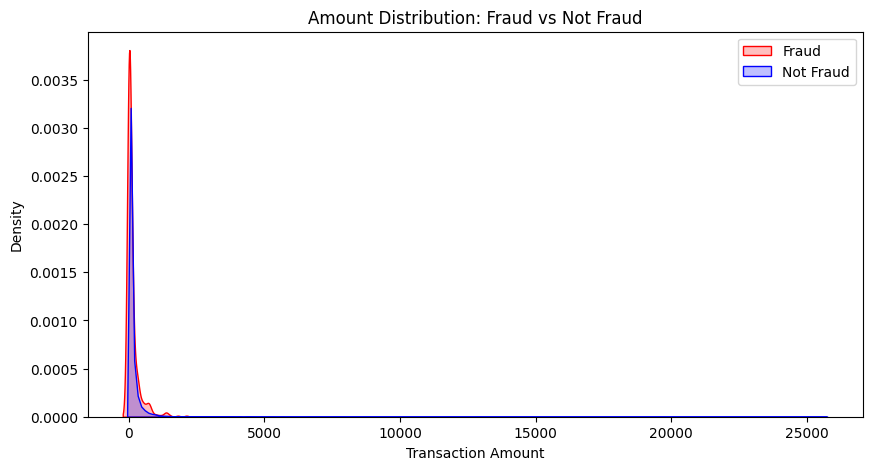

In [57]:
plt.figure(figsize=(10, 5))
fraud_data = fraud_detection[fraud_detection['Class'] == 'Fraud']
not_fraud_data = fraud_detection[fraud_detection['Class'] == 'Not Fraud']

if not fraud_data.empty:
    sns.kdeplot(data=fraud_data, x='Amount', label='Fraud', shade=True, color='red')
else:
    print("No 'Fraud' data available for density estimation.")

if not not_fraud_data.empty:
    sns.kdeplot(data=not_fraud_data, x='Amount', label='Not Fraud', shade=True, color='blue')
else:
    print("No 'Not Fraud' data available for density estimation.")

plt.title('Amount Distribution: Fraud vs Not Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-58-c86aad8e9829>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fraud_detection[fraud_detection['Class'] == 'Fraud'], x='Time', label='Fraud', shade=True, color='red')
<ipython-input-58-c86aad8e9829>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fraud_detection[fraud_detection['Class'] == 'Not Fraud'], x='Time', label='Not Fraud', shade=True, color='blue')


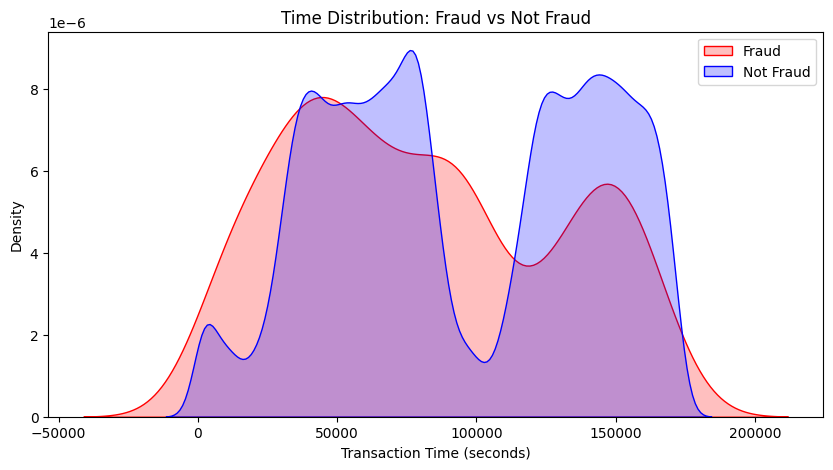

In [58]:
# Plot the distribution of 'Time' for Fraud and Not Fraud
plt.figure(figsize=(10, 5))
sns.kdeplot(data=fraud_detection[fraud_detection['Class'] == 'Fraud'], x='Time', label='Fraud', shade=True, color='red')
sns.kdeplot(data=fraud_detection[fraud_detection['Class'] == 'Not Fraud'], x='Time', label='Not Fraud', shade=True, color='blue')
plt.title('Time Distribution: Fraud vs Not Fraud')
plt.xlabel('Transaction Time (seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

### Feature Correlation

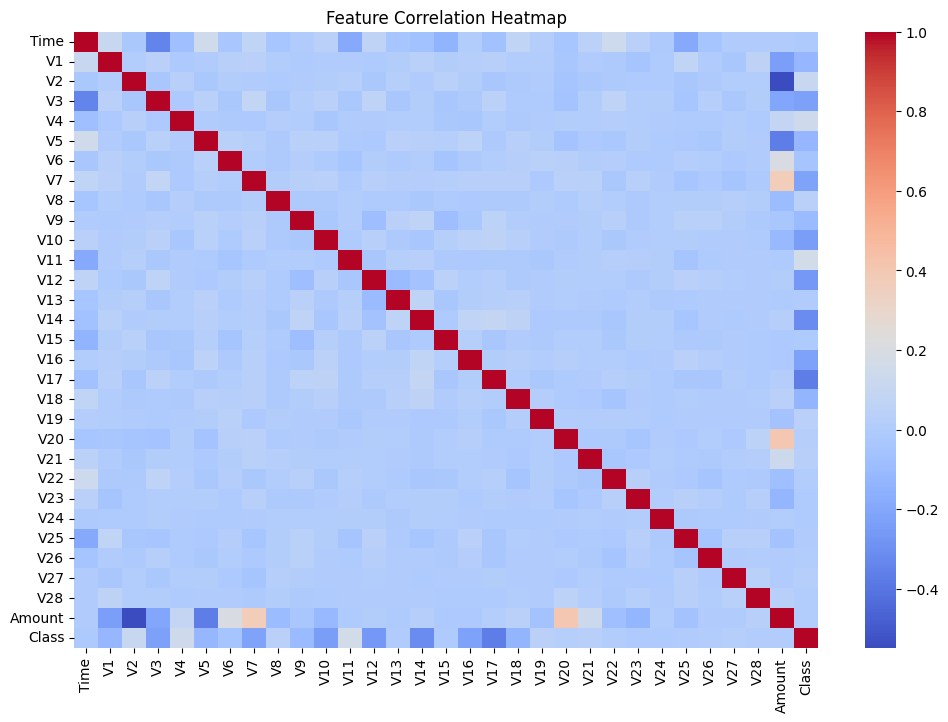

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_detection.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

### Class Distribution

The dataset is highly imbalanced (fraud cases are only 0.172%).

Class
Not Fraud    0.998273
Fraud        0.001727
Name: proportion, dtype: float64
Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


<ipython-input-56-476bb50dc2f2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=fraud_detection, palette='viridis')


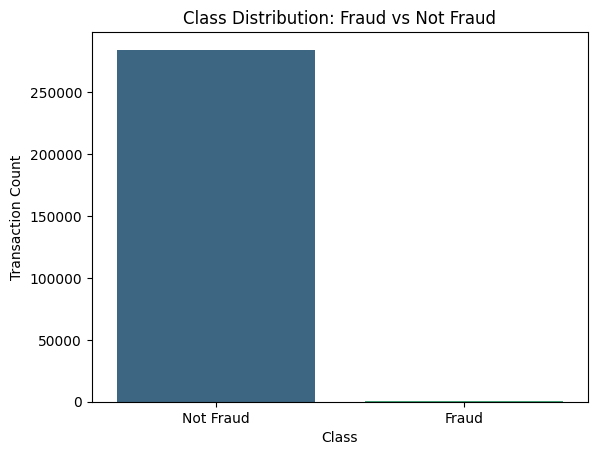

In [56]:
# Map the 'Class' values to labels
fraud_detection['Class'] = fraud_detection['Class'].map({0: 'Not Fraud', 1: 'Fraud'})

# Check distribution of Fraud and Not Fraud transactions
print(fraud_detection['Class'].value_counts(normalize=True))

# Output absolute counts as well
print(fraud_detection['Class'].value_counts())

# Plot the updated class distribution
sns.countplot(x='Class', data=fraud_detection, palette='viridis')
plt.title('Class Distribution: Fraud vs Not Fraud')
plt.ylabel('Transaction Count')
plt.xlabel('Class')
plt.show()

## **5. Data Preprocessing**

### Addressing Imbalance:



### Oversampling with SMOTE

In [60]:
from imblearn.over_sampling import SMOTE

# Features and target
X = fraud_detection.drop('Class', axis=1)
y = fraud_detection['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(y_resampled.value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


### Splitting Data

In [61]:
# Split the data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [62]:
print(f"Training set size: {X_train_resampled.shape}, Testing set size: {X_test_resampled.shape}")

Training set size: (454904, 30), Testing set size: (113726, 30)


### Scaling

In [63]:
# Scale features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Time', 'Amount']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

##**6. Model Building**

### Logistic Regression

In [66]:
# Features and target
X_train_resampled = X_train_resampled
y_train_resampled = y_train_resampled

pipe = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), LogisticRegression(max_iter=500))
scores = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97928139 0.98060035 0.97994087 0.9802816  0.97967685] 0.9799562099270223


### Random Forest

In [ ]:
# classification - Random Forest
pipe = make_pipeline(PolynomialFeatures(degree=1), RandomForestClassifier(n_estimators=1000, max_depth=100, criterion='entropy'))
scores = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
print(scores, scores.mean())

### Evaluation

Evaluate models using:
- Area Under Precision-Recall Curve (AUPRC).
- F1-Score, Precision, Recall.
- Confusion Matrix for additional insights.

In [ ]:
# Predict probabilities on test data
y_pred_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve with pos_label specified
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob, pos_label='Fraud')

# Calculate AUPRC
auprc = average_precision_score(y_test, y_pred_prob)

print(f"AUPRC on test set: {auprc}")

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()